# Synthetic Dataset FCUBE

FCUBE is a synthetic dataset for research in non-IID scenario with feature imbalance. This dataset is proposed in [Federated Learning on Non-IID Data Silos: An Experimental Study](https://arxiv.org/abs/2102.02079).

Data points of FCUBE conain 3 features, that is, $\mathcal{D}_{\text{FCUBE}} = \{ (\mathbf{x}, y) \}$, where each data point $\mathbf{x} = (x_1, x_2, x_3)$, and label $y \in \{ 0, 1 \}$. The distribution of data points is a cube in three dimentions, and if $x_1 > 0$, then $y = 0$, while $y=1$ when $x_1 < 0$. By default, we suggest 4000 data points for trainset, and 1000 for testset.

For more details, please refer to Section (IV-B-b) of original paper.

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib notebook
import pandas as pd
import numpy as np

import sys
sys.path.append('../../../')

import fedlab_benchmarks
from fedlab_benchmarks.datasets import FCUBE

import torch
from torch.utils.data import DataLoader

Dataset `FCUBE` will generate local `.npy` file if `generate=True`. And it also accepts common arguments for dataset: `transform` and `target_transform` to transform the input and target respectively.

## Dataset generation

In [2]:
trainset = FCUBE('../../../../data/FCUBE/', train=True, generate=True,
                 num_samples=1000)
train_loader = DataLoader(trainset, batch_size=20, shuffle=True)

Generate FCUBE data now...
../../../../data/FCUBE/fcube_train_X_1000.npy generated.
../../../../data/FCUBE/fcube_train_y_1000.npy generated.


In [3]:
testset = FCUBE('../../../../data/FCUBE/', train=False, generate=True,
                 num_samples=250)
test_loader = DataLoader(testset, batch_size=20, shuffle=False)

Generate FCUBE data now...
../../../../data/FCUBE/fcube_test_X_250.npy generated.
../../../../data/FCUBE/fcube_test_y_250.npy generated.


## Visualization

In [4]:
train_df = pd.DataFrame({'x1': trainset.data[:,0],
                         'x2': trainset.data[:,1],
                         'x3': trainset.data[:,2],
                         'y': trainset.targets, 
                         'split': ['train'] * trainset.targets.shape[0]})
test_df = pd.DataFrame({'x1': testset.data[:,0],
                        'x2': testset.data[:,1],
                        'x3': testset.data[:,2],
                        'y': testset.targets, 
                        'split': ['test'] * testset.targets.shape[0]})
fcube_df = pd.concat([train_df, test_df], ignore_index=True)

Visualization of class distribution in trainset/testset:

<IPython.core.display.Javascript object>


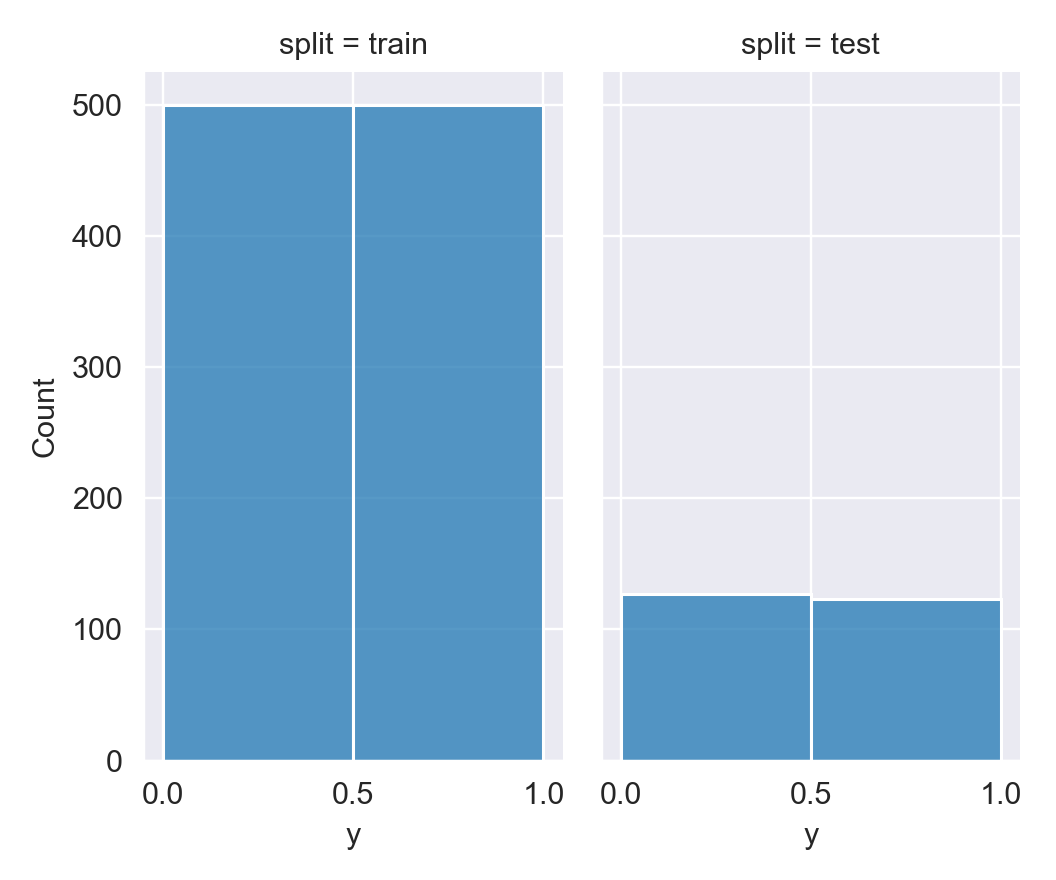

In [5]:
sns.set_style('darkgrid')
sns.displot(fcube_df, x="y", col="split", bins=2, height=4, aspect=.6)
plt.savefig(f"../imgs/fcube_class_dist.png", dpi=400, bbox_inches = 'tight')

Data points distribution for trainset:

<IPython.core.display.Javascript object>


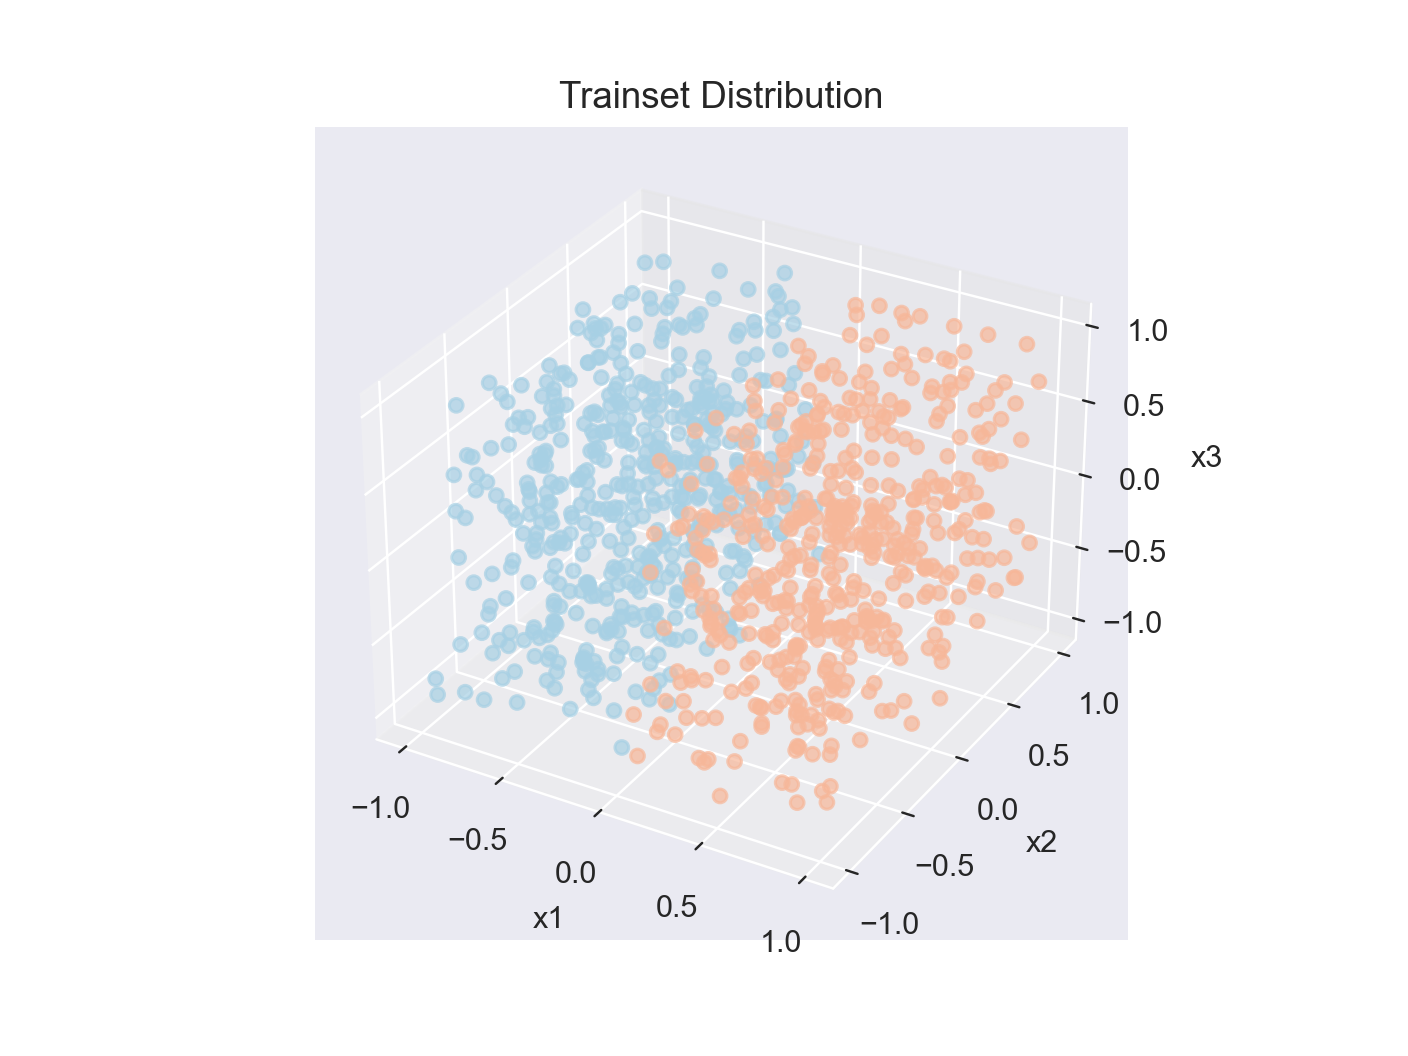

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("RdBu", 2).as_hex())

ax.scatter(train_df['x1'], train_df['x2'], train_df['x3'], c=train_df['y'], marker='o', 
           cmap=cmap, 
           alpha=0.7)
plt.title("Trainset Distribution")
plt.show()
plt.savefig("../imgs/fcube_train_dist_vis.png",  dpi=400, bbox_inches='tight')

Data points distribution for testset:

<IPython.core.display.Javascript object>


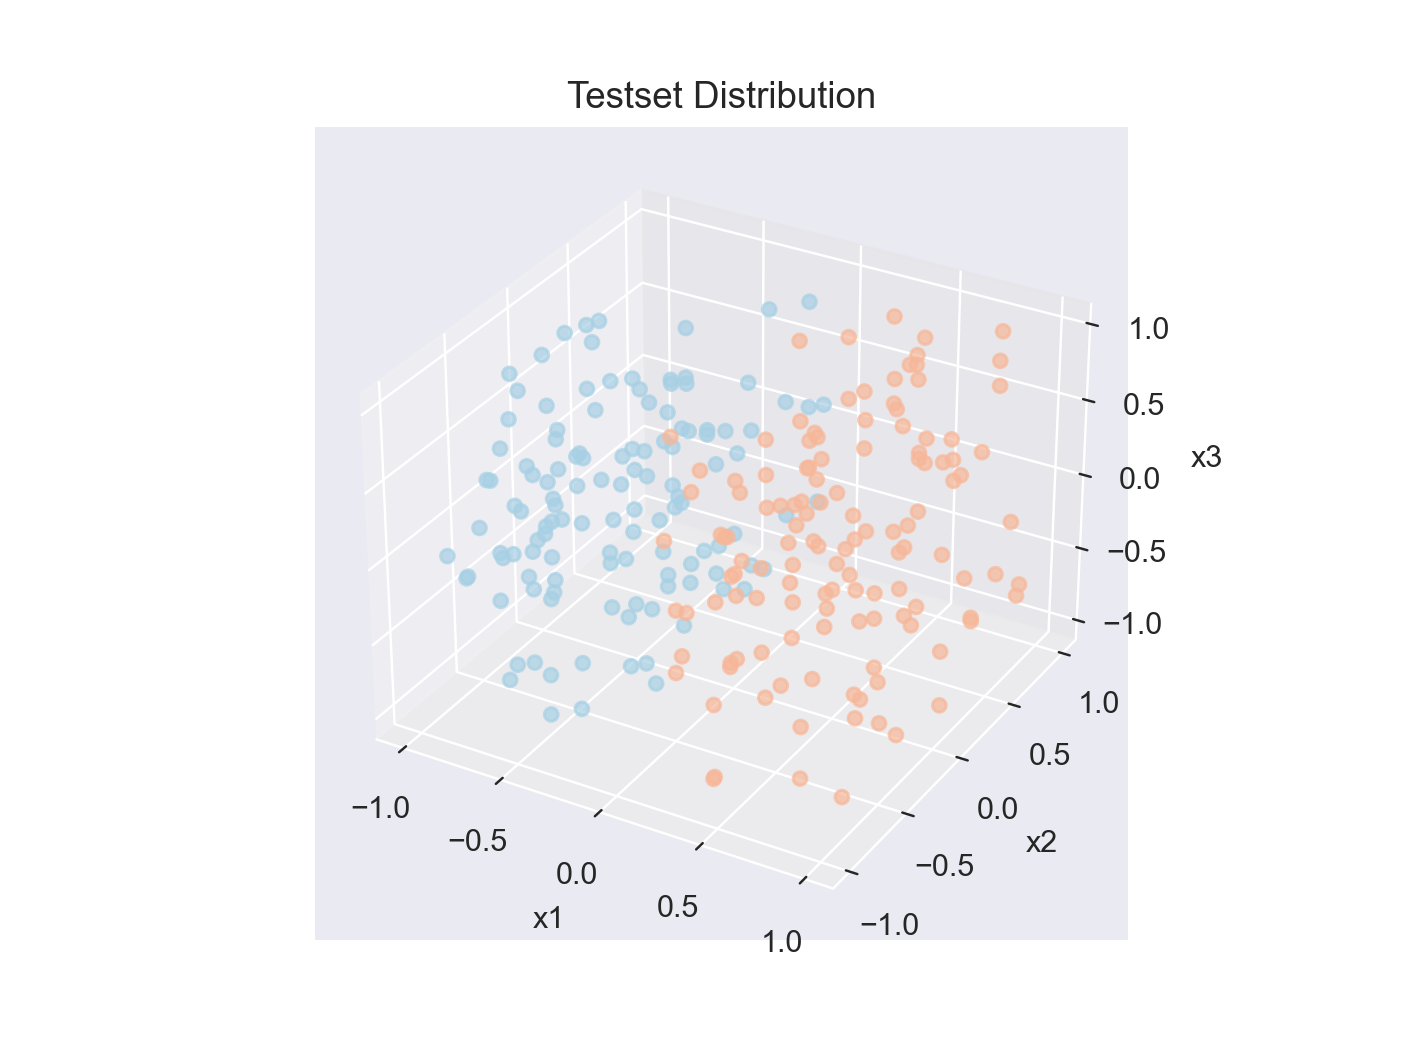

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("RdBu", 2).as_hex())

ax.scatter(test_df['x1'], test_df['x2'], test_df['x3'], c=test_df['y'], marker='o', 
           cmap=cmap, 
           alpha=0.7)
plt.title("Testset Distribution")
plt.show()
plt.savefig("../imgs/fcube_test_dist_vis.png",  dpi=400, bbox_inches='tight')